<h1> Decision Tree model : heart_1 </h1>


<h4>Pre - processing the Dataset </h4>

1. Read and initial checking of dataset

In [1]:
import pandas as pd

data = pd.read_csv('data/heart.csv')

data.shape

(918, 12)

2. Variable Standardization
- Convert the row values to numerical value according to <b>heart_2</b> dataset 

In [2]:
# convert the following columns to numerical values

def convert_to_numeric(data):

    # 'Sex' column
    data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})

    # 'ChestPainType' column
    data['ChestPainType'] = data['ChestPainType'].map({'ASY': 0, 'TA': 1, 'ATA': 2, 'NAP': 3})

    # 'RestingECG' column
    data['RestingECG'] = data['RestingECG'].map({'LVH': 0, 'Normal': 1, 'ST': 2})

    # 'ExerciseAngina' column
    data['ExerciseAngina'] = data['ExerciseAngina'].map({'Y': 1, 'N': 0})

    # 'ST_Slope' column
    data['ST_Slope'] = data['ST_Slope'].map({'Down': 0, 'Flat': 1, 'Up': 2})

    return data

data = convert_to_numeric(data)

In [3]:
#check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [4]:
#check the null values in our dataset
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
#check the description
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.090414,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,1.267622,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [6]:
# Check the head
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,1,172,0,0.0,2,0
1,49,0,3,160,180,0,1,156,0,1.0,1,1
2,37,1,2,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,3,150,195,0,1,122,0,0.0,2,0


HeartDisease
1    508
0    410
Name: count, dtype: int64
Total number of samples: 918
Samples for High Risk Heart Disease: 508
Samples for Low Risk Heart Disease: 410
Percentage of High Risk: 55.34%
Percentage of Low Risk: 44.66%


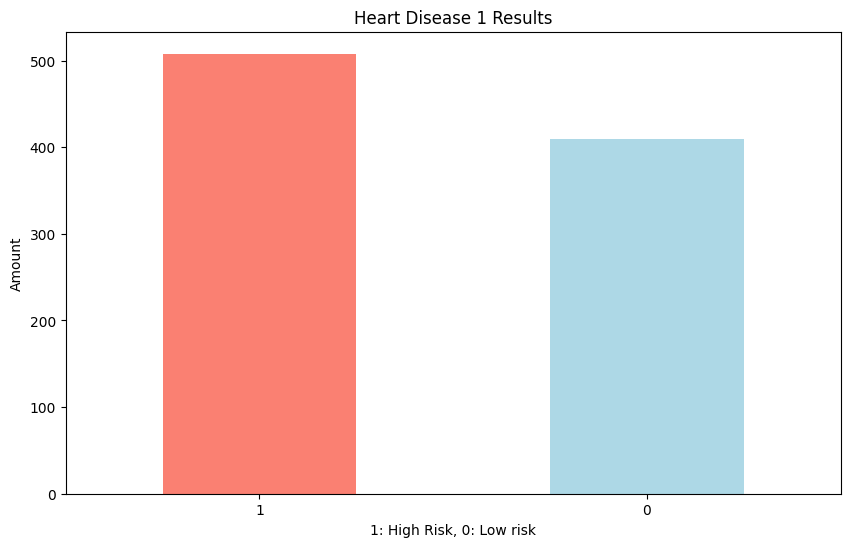

In [7]:
#check the output of the dataset (1: High risk, 0: Low risk)
import matplotlib.pyplot as plt 

result = data['HeartDisease'].value_counts()
print(result)

# Calculate the total number of samples
total_samples = len(data['HeartDisease'])

# Calculate the percentage of each class
percentage_low_risk = (result[0] / total_samples) * 100
percentage_high_risk = (result[1] / total_samples) * 100

print("Total number of samples: {}".format(total_samples))
print("Samples for High Risk Heart Disease: {}".format(result[1]))
print("Samples for Low Risk Heart Disease: {}".format(result[0]))

print("Percentage of High Risk: {:.2f}%".format(percentage_high_risk))
print("Percentage of Low Risk: {:.2f}%".format(percentage_low_risk))


data['HeartDisease'].value_counts().plot(kind = 'bar', figsize = (10, 6), color = ['salmon', 'lightblue'])

plt.title("Heart Disease 1 Results")
plt.xlabel("1: High Risk, 0: Low risk")
plt.ylabel("Amount")
plt.xticks(rotation = 0)

plt.savefig("images/heart_disease_1_plot.png")

3. Assign the feature columns to <i>x</i> and target column to <i>y</i>

In [8]:
feature_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

x = data[feature_columns]
y = data['HeartDisease']

4. Split the data into train and test subset
5. Train the decision tree model with max_depth=3

In [9]:
# import scikit learn libraries 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

6. Evaluation Scores


- Accuracy Score

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print('Testing Accuracy:', accuracy_score(y_test, y_pred))

Testing Accuracy: 0.8333333333333334


- Classification report (Precision, Recall, f1-score)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       112
           1       0.89      0.82      0.85       164

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276



- Confusion Matrix

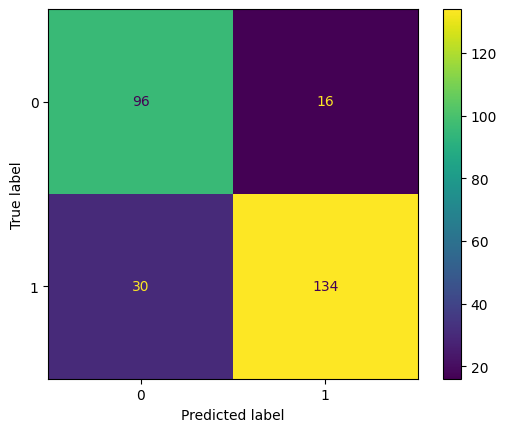

In [12]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(cm)

# Plot the confusion matrix
disp.plot()


- Cross validation score

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()

0.815775718698028

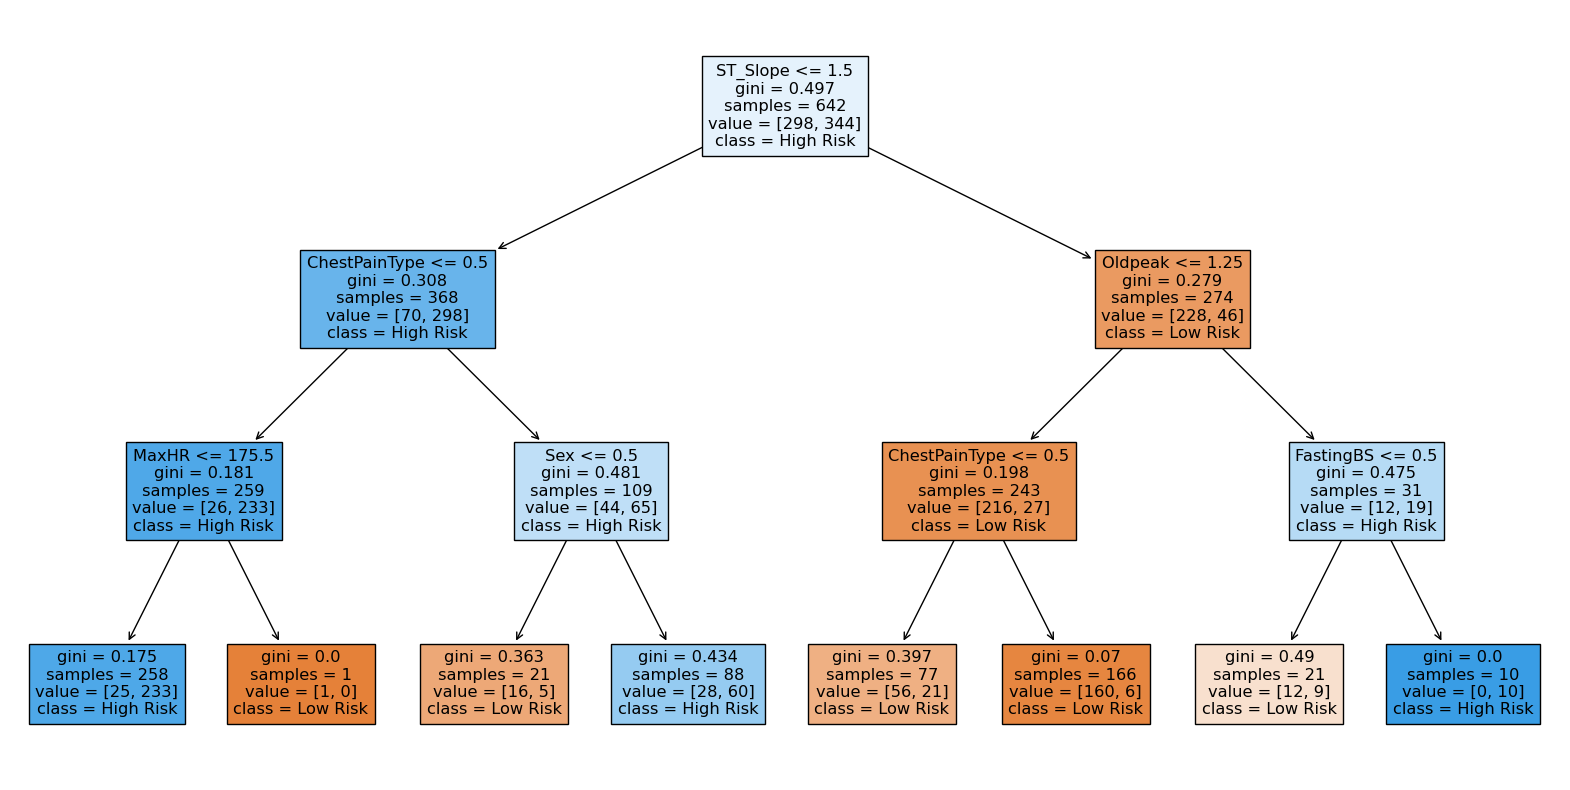

In [14]:
from sklearn.tree import plot_tree

# Plotting decision tree
plt.figure(figsize = (20, 10))
plot_tree(clf, filled = True, feature_names = feature_columns, class_names = ['Low Risk', 'High Risk'])
plt.savefig('Heart Rate Disease Decision-Tree')
plt.show()

In [15]:
df_importance = pd.DataFrame({'Features' : x.columns,'Importances' : clf.feature_importances_,}).sort_values('Importances', ascending = False)
df_importance

,Features,Importances
10,ST_Slope,0.735390
2,ChestPainType,0.113642
9,Oldpeak,0.078666
1,Sex,0.037933
5,FastingBS,0.025136
7,MaxHR,0.009232
0,Age,0.000000
3,RestingBP,0.000000
4,Cholesterol,0.000000
6,RestingECG,0.000000


7. Prolog implementation by querying <i>heart.pl</i>

In [16]:
from pyswip import Prolog

prolog = Prolog()

prolog.consult('heart.pl')

data_pl = pd.read_csv('data/heart.csv')

# Create an empty list to store the result of high cholesterol and high blood pressure
heart_rate_risk = []

for index, row in data_pl.iterrows():
    # Get the cholesterol value from the current row
    cholesterol_value = row['Cholesterol']

    # Get the blood pressure value from the current row
    blood_pressure_value = row['RestingBP']

    # Query the Prolog engine to check if the cholesterol level is above 193 & blood pressure is above 120
    result = bool(list(prolog.query(f"heart_rate_risk({cholesterol_value}, {blood_pressure_value})")))

    # Append 1 or 0 to the high_cholesterol list based on the query result
    heart_rate_risk.append(1 if result else 0)

# Add the high_cholesterol list as a new column in the DataFrame
data_pl['HeartDiseaseProlog'] = heart_rate_risk

# Convert the categorical columns to numeric
data_pl = convert_to_numeric(data_pl)

# Drop the  'Cholesterol' and 'RestingBP' columns
data_pl.drop(columns=['Cholesterol', 'RestingBP'], inplace = True)

# Show the head of the new DataFrame
data_pl.head()

,Age,Sex,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartDiseaseProlog
0,40,1,2,0,1,172,0,0.0,2,0,1
1,49,0,3,0,1,156,0,1.0,1,1,0
2,37,1,2,0,2,98,0,0.0,2,0,1
3,48,0,0,0,1,108,1,1.5,1,1,1
4,54,1,3,0,1,122,0,0.0,2,0,1


8. Retrained decision tree model

In [17]:
# include 'HeartDiseaseProlog' in the feature columns
feature_columns_pl = ['Age', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDiseaseProlog']

x_pl = data_pl[feature_columns_pl]
y_pl = data_pl['HeartDisease']

In [18]:
x_train_pl, x_test_pl, y_train_pl, y_test_pl = train_test_split(x_pl, y_pl, test_size = 0.3, random_state=42)

# Create Decision Tree Classifier object
model = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
model = model.fit(x_train_pl, y_train_pl)

# Predict the response for test dataset
y_pred_pl = model.predict(x_test_pl)

- Accuracy Score

In [19]:
print('Testing Accuracy:', accuracy_score(y_test_pl, y_pred_pl))

Testing Accuracy: 0.8333333333333334


- Classification report (Precision, Recall, f1-score)

In [20]:
print(classification_report(y_test_pl, y_pred_pl))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       112
           1       0.89      0.82      0.85       164

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276



- Confusion Matrix

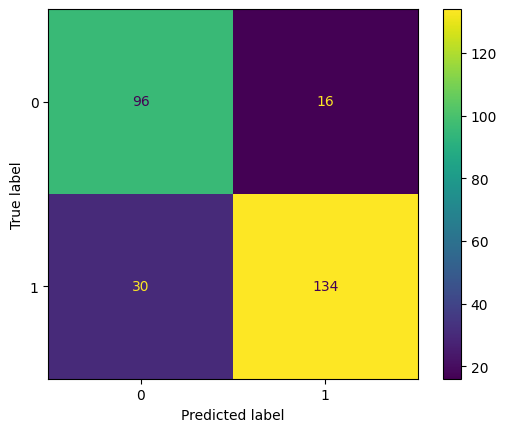

In [21]:
# Confusion Matrix 
cm = confusion_matrix(y_test_pl, y_pred_pl)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(cm)

# Plot the confusion matrix
disp.plot()

- Cross validation score

In [22]:
cross_val_score(model, x_pl, y_pl, cv=5, scoring='accuracy').mean()

0.8386849607982894